## About dataset
It is taken from Kaggle. It is a set of SMS tagged messages that have been collected for SMS Spam research. It contains messages in English and are tagged as ham (legitimate) or spam.

Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Problem statement
To classify emails as spam or ham (legitimate, not spam)

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Columns description
Column v1 contains labels as spam or ham (legitimate) and v2 contains raw text of messages. Columns 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' contains (row-wise) continuation of some messages given in v2 column. I will join all these discontinued message texts and create a full message in v2 column in data preprocessing step.

## Explore data 

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Check for null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

403

## Observation
* There are 5572 rows and 5 columns in the data.
* All the columns are categorical.
* There are some duplicates in the data. I will remove them in the data preprocessing step.
* There are null values in last 3 columns. But as I mentioned earlier, these columns contains continuation of some messages of v2 column. When I will join these discontinued message texts by combining columns, I will drop these 3 columns since they will be rendered redundant.

## Data preprocessing

* ### Combine 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' columns with v2 column

I will combine each of these columns one by one into v2 column. I will use 'for loop' for this purpose. If the cell contains (discontinued) message text, loop will join it with v2 column using + operator and then will assign the cell zero value (just for acknowledgement). And, if the cell contains null value, it will again assign the cell zero value. Then I will check value_counts of the column to see whether the combining process has been done completely or not. If the value_counts gives all zeros, then the process is done successfully. I will then drop that column since it will no longer be needed.  

In [7]:
# Combine 'Unnamed: 2' with v2 column using for loop
for i in range(df.shape[0]):
    if df['Unnamed: 2'][i] != 'NaN':
        df['v2'][i] = str(df['v2'][i]) + str(df['Unnamed: 2'][i])
        df['Unnamed: 2'][i] = 0
    else:
        df['Unnamed: 2'][i] = 0

In [8]:
# Check value_counts
df['Unnamed: 2'].value_counts()

0    5572
Name: Unnamed: 2, dtype: int64

Columns 'Unnamed: 2' and 'v2' are joined successfully. Let's drop this column now.

In [9]:
# Drop column 'Unnamed: 2'
df.drop('Unnamed: 2', axis=1, inplace=True)

Follow the same process for other 2 columns, namely, 'Unnamed: 3' & 'Unnamed: 4'

In [10]:
# Combine 'Unnamed: 3' with v2 column
for i in range(df.shape[0]):
    if df['Unnamed: 3'][i] != 'NaN':
        df['v2'][i] = str(df['v2'][i]) + str(df['Unnamed: 3'][i])
        df['Unnamed: 3'][i] = 0
    else:
        df['Unnamed: 3'][i] = 0
        
# Combine 'Unnamed: 4' with v2 column
for i in range(df.shape[0]):
    if df['Unnamed: 4'][i] != 'NaN':
        df['v2'][i] = str(df['v2'][i]) + str(df['Unnamed: 4'][i])
        df['Unnamed: 4'][i] = 0
    else:
        df['Unnamed: 4'][i] = 0

In [11]:
# Check value_counts
print(df['Unnamed: 3'].value_counts())
print(df['Unnamed: 4'].value_counts())

0    5572
Name: Unnamed: 3, dtype: int64
0    5572
Name: Unnamed: 4, dtype: int64


Both columns are combined with v2 column. Let's drop them.

In [12]:
df.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [13]:
# View changed shape of dataframe
df.shape

(5572, 2)

* ### Dropping duplicates

In [14]:
df.drop_duplicates(inplace=True)
# View changed shape of dataframe
df.shape

(5169, 2)

* ### Convert categorical 'v1' column into numerical

In [15]:
df['v1'] = df['v1'].replace({'ham':1,'spam':0})

In [16]:
# View changes in the dataframe
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...nannannan
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


* ### Rename columns 'v1' and 'v2'

In [17]:
df.rename(columns={"v1": "labels", "v2": "msg_text"}, inplace=True)
# View changes
df.head(3)

,labels,msg_text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...nannannan
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


* ### Preprocess text in 'v2' column 

In [18]:
import re
processed_msg_text = []
for i in df['msg_text']:
    # Step 1 : Convert to lower case
    s = i.lower()
    # Step 2 : Remove special characters
    s = re.sub('[^a-z ]','',s)
    processed_msg_text.append(s)
    
# View first 5 processed texts
processed_msg_text[0:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore watnannannan',
 'ok lar joking wif u oninannannan',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply oversnannannan',
 'u dun say so early hor u c already then saynannannan',
 'nah i dont think he goes to usf he lives around here thoughnannannan']

In [19]:
# Add new column for processed text
df['processed_msg_text'] = processed_msg_text
# View changes
df.head(3)

,labels,msg_text,processed_msg_text
0,1,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...nannannan,ok lar joking wif u oninannannan
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...


* ### Convert 'processed_msg_text' column into numerical dtype using TfidfVectorizer
Define this as X variable.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['processed_msg_text']).toarray()

In [21]:
# View changes
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* ### Define Y variable

In [22]:
Y = df['labels']

In [23]:
Y.value_counts()

1    4516
0     653
Name: labels, dtype: int64

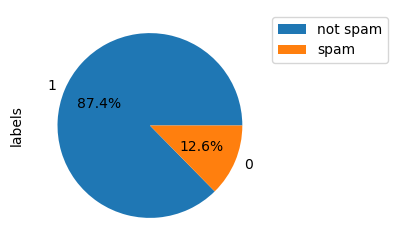

In [24]:
plt.figure(figsize=(3,3))
df['labels'].value_counts().plot(kind='pie', autopct = "%1.1f%%")
plt.legend(['not spam','spam'], bbox_to_anchor = (1,1))
plt.show()

This is an imbalanced dataset. Nearly 87% message texts are not spam. 

## Building model: Logistic Regression

We have already defined X and Y variables. Let's split data and start training model in machine learning. 

In [25]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

In [26]:
# Initialize model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# Fit training data
log_model.fit(xtrain, ytrain)

LogisticRegression()

In [27]:
# Prediction
ypred = log_model.predict(xtest)

In [28]:
# Evaluate model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy of the model: ', round(accuracy_score(ytest, ypred)*100, 2), '%')
print('---------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred))
print('---------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred))

Accuracy of the model:  94.51 %
---------------------------------------------
Confusion matrix: 
 [[  87   70]
 [   1 1135]]
---------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.55      0.71       157
           1       0.94      1.00      0.97      1136

    accuracy                           0.95      1293
   macro avg       0.97      0.78      0.84      1293
weighted avg       0.95      0.95      0.94      1293



## Creating an Email spam detector 

In [29]:
text = input('Enter message text: \n')
print('                                                           ')
# Convert text to lower case
text = text.lower()

# Remove special characters
text = re.sub('[^a-z ]','',text)

# Tfidf transform
x = tfidf.transform([text]).toarray()

# Prediction
ypred = log_model.predict(x)

# Find probability
ypred_prob = log_model.predict_proba(x)

# Classification
if ypred == 1:
    print(f'Prediction: {ypred_prob.flatten()[1]*100:.2f} percent not spam')
else:
    print(f'Prediction: {ypred_prob.flatten()[0]*100:.2f} percent spam')

Enter message text: 
'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.nannannan'
                                                           
Prediction: 81.19 percent spam


### This model has 94% accuracy.